In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st

In [219]:
data = pd.read_csv('c.csv')
data

gender race_ethnicity parental_level_of_education  lunch  \
0         0        group B           bachelor's degree      1   
1         0        group C                some college      1   
2         0        group B             master's degree      1   
3         1        group A          associate's degree      0   
4         1        group C                some college      1   
..      ...            ...                         ...    ...   
995       0        group E             master's degree      1   
996       1        group C                 high school      0   
997       0        group C                 high school      0   
998       0        group D                some college      1   
999       0        group D                some college      0   

     test_preparation_course  math_score  reading_score  writing_score  \
0                          0          72             72             74   
1                          1          69             90             88   
2                          0          90             95             93   
3                          0          47             57             44   
4                          0          76             78             75   
..                       ...         ...            ...            ...   
995                        1          88             99             95   
996                        0          62             55             55   
997                        1          59             71             65   
998                        1          68             78             77   
999                        0          77             86             86   

     total_score  average_score  
0            218      72.666667  
1            247      82.333333  
2            278      92.666667  
3            148      49.333333  
4            229      76.333333  
..           ...            ...  
995          282      94.000000  
996          172      57.333333  
997          195      65.000000  
998          223      74.333333  
999          249      83.000000  

[1000 rows x 10 columns]

In [221]:
data.head()

gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.333333

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


In [225]:
data.shape

(1000, 10)

In [227]:
data.value_counts()

gender  race_ethnicity  parental_level_of_education  lunch  test_preparation_course  math_score  reading_score  writing_score  total_score  average_score
0       group A         associate's degree           0      0                        37          57             56             150          50.000000        1
1       group C         associate's degree           1      0                        47          37             35             119          39.666667        1
                                                     0      0                        55          61             54             170          56.666667        1
                                                                                     58          55             53             166          55.333333        1
                                                                                     64          66             59             189          63.000000        1
                                                   

In [229]:
data.describe()

gender        lunch  test_preparation_course  math_score  \
count  1000.000000  1000.000000              1000.000000  1000.00000   
mean      0.482000     0.645000                 0.358000    66.08900   
std       0.499926     0.478753                 0.479652    15.16308   
min       0.000000     0.000000                 0.000000     0.00000   
25%       0.000000     0.000000                 0.000000    57.00000   
50%       0.000000     1.000000                 0.000000    66.00000   
75%       1.000000     1.000000                 1.000000    77.00000   
max       1.000000     1.000000                 1.000000   100.00000   

       reading_score  writing_score  total_score  average_score  
count    1000.000000    1000.000000  1000.000000    1000.000000  
mean       69.169000      68.054000   203.312000      67.770667  
std        14.600192      15.195657    42.771978      14.257326  
min        17.000000      10.000000    27.000000       9.000000  
25%        59.000000      57.750000   175.000000      58.333333  
50%        70.000000      69.000000   205.000000      68.333333  
75%        79.000000      79.000000   233.000000      77.666667  
max       100.000000     100.000000   300.000000     100.000000

In [231]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

In [233]:
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols

Index(['race_ethnicity', 'parental_level_of_education'], dtype='object')

In [235]:
for i in categorical_cols:
    print(data[i].unique())

['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [237]:
data['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [239]:
data['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

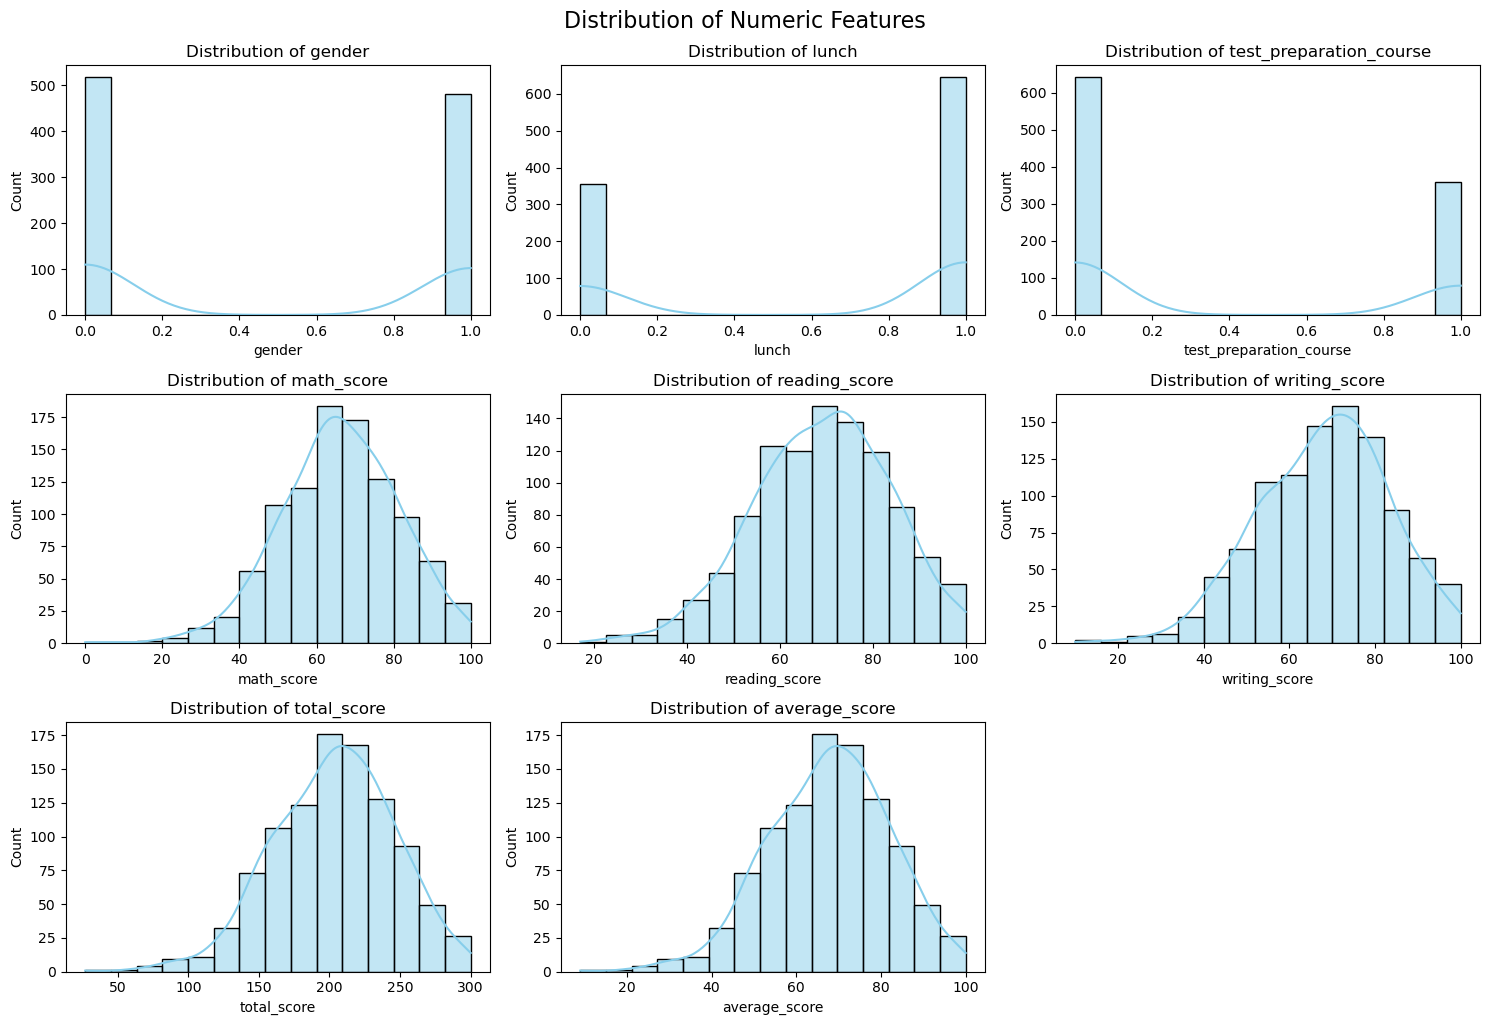

In [243]:
plt.figure(figsize=(15, 10))
numeric_features = ['gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1) 
    sns.histplot(data[feature], kde=True, bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.suptitle('Distribution of Numeric Features', y=1.02, fontsize=16)
plt.show()

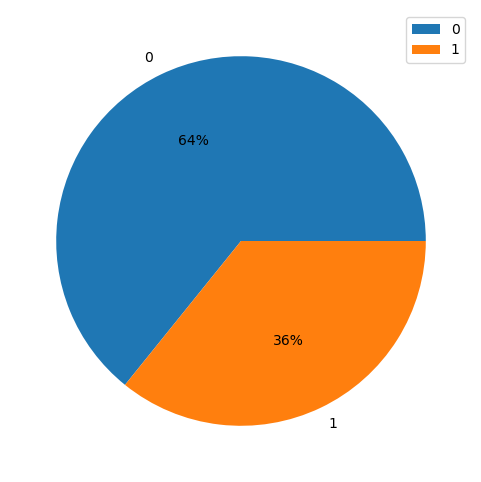

In [244]:
count_test = data['test_preparation_course'].value_counts()
labels = data['test_preparation_course'].value_counts().index
plt.figure(figsize= (6,6))
plt.pie(count_test,labels=labels,autopct='%1.f%%')
plt.legend(labels)
plt.show()

In [245]:
data['average_score']=(data['math_score']+data['reading_score']+data['writing_score'])/3

In [246]:
data.head()

gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.333333

<Axes: xlabel='average_score', ylabel='math_score'>

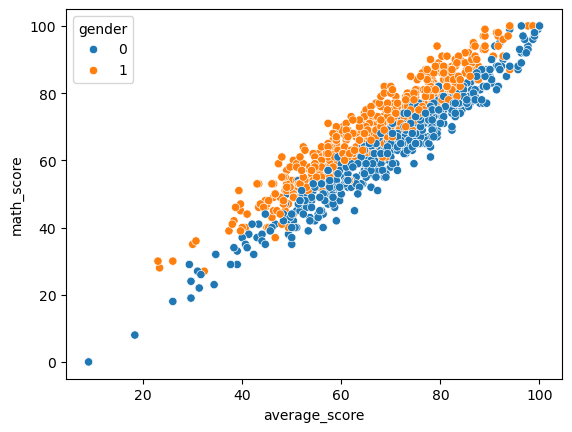

In [247]:
sns.scatterplot(x=data['average_score'],y=data['math_score'],hue=data['gender'])

<Axes: xlabel='average_score', ylabel='reading_score'>

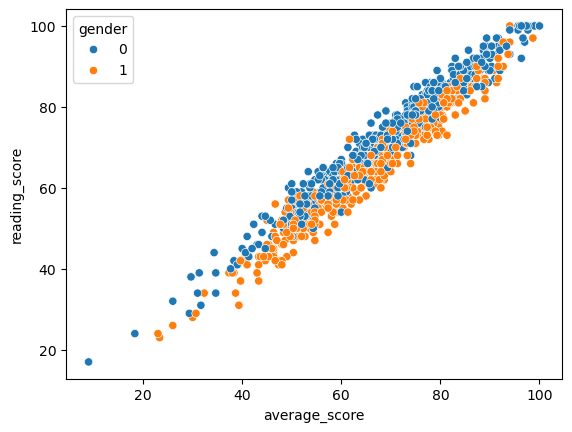

In [248]:
sns.scatterplot(x=data['average_score'],y=data['reading_score'],hue=data['gender'])

<Axes: xlabel='average_score', ylabel='writing_score'>

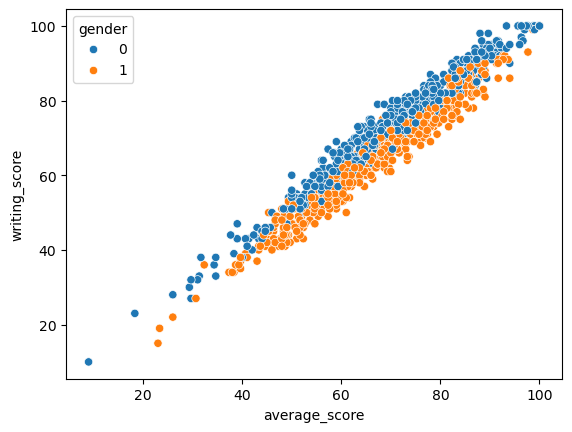

In [249]:
sns.scatterplot(x=data['average_score'],y=data['writing_score'],hue=data['gender'])

In [250]:
race = {
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4
}

In [251]:
data['race_ethnicity'] = data['race_ethnicity'].map(race)

In [252]:
level = {
    "bachelor's degree":0,
    'some college':1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5
}

In [253]:
data['parental_level_of_education'] = data['parental_level_of_education'].map(level)

In [258]:
data.head()

gender  race_ethnicity  parental_level_of_education  lunch  \
0       0               1                            0      1   
1       0               2                            1      1   
2       0               1                            2      1   
3       1               0                            3      0   
4       1               2                            1      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.333333

In [260]:
data = data.drop(['lunch', 'test_preparation_course'], axis=1, inplace=False)

In [262]:
data

gender  race_ethnicity  parental_level_of_education  math_score  \
0         0               1                            0          72   
1         0               2                            1          69   
2         0               1                            2          90   
3         1               0                            3          47   
4         1               2                            1          76   
..      ...             ...                          ...         ...   
995       0               4                            2          88   
996       1               2                            4          62   
997       0               2                            4          59   
998       0               3                            1          68   
999       0               3                            1          77   

     reading_score  writing_score  total_score  average_score  
0               72             74          218      72.666667  
1               90             88          247      82.333333  
2               95             93          278      92.666667  
3               57             44          148      49.333333  
4               78             75          229      76.333333  
..             ...            ...          ...            ...  
995             99             95          282      94.000000  
996             55             55          172      57.333333  
997             71             65          195      65.000000  
998             78             77          223      74.333333  
999             86             86          249      83.000000  

[1000 rows x 8 columns]

In [268]:
X = data.drop(['average_score'], axis=1)
X

gender  race_ethnicity  parental_level_of_education  math_score  \
0         0               1                            0          72   
1         0               2                            1          69   
2         0               1                            2          90   
3         1               0                            3          47   
4         1               2                            1          76   
..      ...             ...                          ...         ...   
995       0               4                            2          88   
996       1               2                            4          62   
997       0               2                            4          59   
998       0               3                            1          68   
999       0               3                            1          77   

     reading_score  writing_score  total_score  
0               72             74          218  
1               90             88          247  
2               95             93          278  
3               57             44          148  
4               78             75          229  
..             ...            ...          ...  
995             99             95          282  
996             55             55          172  
997             71             65          195  
998             78             77          223  
999             86             86          249  

[1000 rows x 7 columns]

In [273]:
y = data['average_score']
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [277]:
# 01 Linear Regression Model
from sklearn.linear_model import LinearRegression  

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
y_pred = LinearRegressionModel.predict(X_test)

# Measure Error Of Linear Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred )
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score Error: {r2}')

Mean Squared Error: 2.4284294106323625e-28
Mean Absolute Error: 1.4296119843493216e-14
R2 Score Error: 1.0


In [279]:
# 02 Lasso Regression Model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score Error: {r2}')

Mean Squared Error: 0.0005996372450783329
Mean Absolute Error: 0.01978548302264518
R2 Score Error: 0.9999971743673493


In [281]:
# 03 Ridge Regression Model
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score Error: {r2}')

Mean Squared Error: 7.219161418945672e-11
Mean Absolute Error: 6.882015273660613e-06
R2 Score Error: 0.9999999999996598


In [283]:
# 04 KNN Regression Model
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score Error: {r2}')

Mean Squared Error: 0.182062222222222
Mean Absolute Error: 0.31013333333333326
R2 Score Error: 0.999142079709365


In [285]:
# 05 Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score Error: {r2}')

Mean Squared Error: 0.1137777777777776
Mean Absolute Error: 0.08266666666666675
R2 Score Error: 0.999463852176539


In [287]:
X = data.drop(['race_ethnicity'] , axis=1)
X

gender  parental_level_of_education  math_score  reading_score  \
0         0                            0          72             72   
1         0                            1          69             90   
2         0                            2          90             95   
3         1                            3          47             57   
4         1                            1          76             78   
..      ...                          ...         ...            ...   
995       0                            2          88             99   
996       1                            4          62             55   
997       0                            4          59             71   
998       0                            1          68             78   
999       0                            1          77             86   

     writing_score  total_score  average_score  
0               74          218      72.666667  
1               88          247      82.333333  
2               93          278      92.666667  
3               44          148      49.333333  
4               75          229      76.333333  
..             ...          ...            ...  
995             95          282      94.000000  
996             55          172      57.333333  
997             65          195      65.000000  
998             77          223      74.333333  
999             86          249      83.000000  

[1000 rows x 7 columns]

In [289]:
y = data['race_ethnicity']
y

0      1
1      2
2      1
3      0
4      2
      ..
995    4
996    2
997    2
998    3
999    3
Name: race_ethnicity, Length: 1000, dtype: int64

In [291]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

Accuracy Score: 0.328


C:\Users\youse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


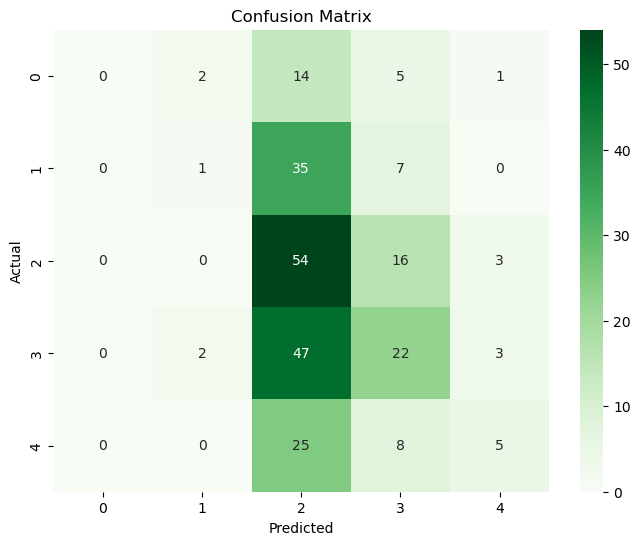

In [293]:
# Logistic Regression Model For Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score

LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train,y_train)
y_pred = LogisticRegressionModel.predict(X_test)

# Measure Error Of Logistic Regression Model
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy Score: 0.328


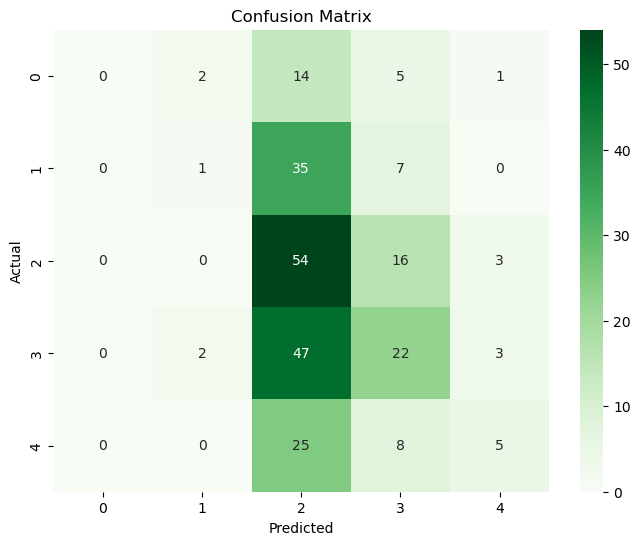

In [295]:
# Decision Tree Classifier Model For Classification
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifierModel = DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(X_train, y_train)
y_pred_tree = DecisionTreeClassifierModel.predict(X_test)

# Measure Error Of Decision Tree Classifier Model
acs = accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy Score: 0.228


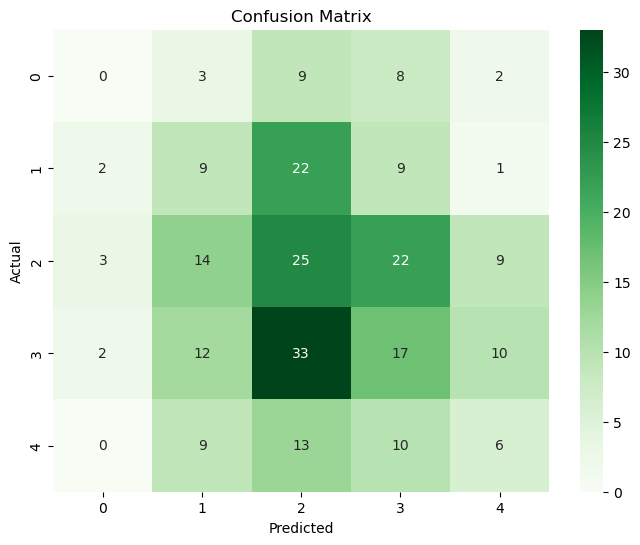

In [297]:
# Random Forest Classifiere Model For Classification
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier()
RandomForestClassifierModel.fit(X_train, y_train)
y_pred = RandomForestClassifierModel.predict(X_test)

# Measure Error Of Random Forest Classifiere Model
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [298]:
# 01
import pickle

model = LinearRegressionModel  

model_filename = 'LinearRegressionModel.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to LinearRegressionModel.pkl


In [301]:
# 02
import pickle

model = lasso_model  

model_filename = 'lasso_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to lasso_model.pkl


In [303]:
# 03
import pickle

model = ridge_model  

model_filename = 'ridge_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to ridge_model.pkl


In [305]:
# 04
import pickle

model = knn_model  

model_filename = 'knn_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to knn_model.pkl


In [307]:
# 05
import pickle

model = dt_model  

model_filename = 'dt_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to dt_model.pkl


In [309]:
# 06
import pickle

model = LogisticRegressionModel  

model_filename = 'LogisticRegressionModel.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to LogisticRegressionModel.pkl


In [311]:
# 07
import pickle

model = DecisionTreeClassifierModel  

model_filename = 'DecisionTreeClassifierModel.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to DecisionTreeClassifierModel.pkl


In [313]:
# 08
import pickle

model = RandomForestClassifierModel  

model_filename = 'RandomForestClassifierModel.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to RandomForestClassifierModel.pkl


In [383]:
%%writefile myproject.py
import streamlit as st
import pickle
import numpy as np


Model_of_Regression = [
    'LinearRegressionModel.pkl', 'lasso_model.pkl', 'ridge_model.pkl',
    'knn_model.pkl', 'dt_model.pkl'
]

Model_of_Classifier = [
    'LogisticRegressionModel.pkl', 'DecisionTreeClassifierModel.pkl', 'RandomForestClassifierModel.pkl'
]


st.title("Prediction App")
st.write("Choose your model and provide input values to get predictions:")

model_type = st.sidebar.radio("Select Model Type:", ("Regression", "Classification"))

if model_type == "Regression":
    selected_model = st.sidebar.selectbox("Please choose your Regression model:", Model_of_Regression)
elif model_type == "Classification":
    selected_model = st.sidebar.selectbox("Please choose your Classification model:", Model_of_Classifier)


try:
    with open(selected_model, 'rb') as file:
        model = pickle.load(file)
except FileNotFoundError:
    st.error(f"Error: {selected_model} not found.")
    st.stop()


def get_inputs():
    inputs = []
    num_inputs = st.number_input("Number of features:", min_value=1, step=1, value=6)  # Adjust as needed
    for i in range(num_inputs):
        val = st.number_input(f"Feature {i+1}:", step=0.01)
        inputs.append(val)
    return np.array([inputs])


features = get_inputs()


if st.button("Predict"):
    try:
        prediction = model.predict(features)
        if model_type == "Regression":
            st.success(f"The Prediction is: {prediction[0]:.2f}")
        elif model_type == "Classification":
            st.success(f"The Predicted Class is: {int(prediction[0])}")
    except Exception as e:
        st.error(f"An error occurred: {e}")


Overwriting myproject.py


In [385]:
! streamlit run myproject.py

^C
